# Coding Assignment Numero Dos!

### The quest of Baby Bella
### A story of optimal PAWS-ition in a Grid World

Below is the project assignment:

In this project, you will implement the value iteration algorithm to find the optimal value function for a simple grid world environment. The goal is to help an agent navigate this grid to reach a specified terminal state while avoiding obstacles. Your implementation should include the following components:
* Create a 2D grid world with specified dimensions where the agent can move in four directions: up, down, left, and right. The grid should contain cells that are either "empty" or "blocked," and the agent’s goal is to reach a specific terminal state.
* Implement the value iteration algorithm to find the optimal value function for this grid world. You can use a discount factor (gamma) of your choice.
* Display the grid world with obstacles and the optimal value function for each state in the grid (after convergence).
* Create a graph that shows how the value function changes over iterations during the value iteration process. The x-axis should represent the number of iterations, and the y-axis should represent the value function. Analyze the convergence behavior.

* *For students who want to experiment more, you can add extensions to the project, such as introducing a stochastic environment, varying the goal positions, or exploring different discount factors.


## Installing the necessary packages

In [2]:
pip install pandas # Pandas is a library for data manipulation and analysis particularly useful for working with tabular data in csv files and xlxs files. 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy # Numpy is a library for working with arrays and matrices. It is pretty much the standard. 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Jinja2 # Jinja2 is a templating language for Python. It is used to create HTML, XML or other markup formats that are returned to the user via an HTTP request.

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn # Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Note: you may need to restart the kernel to use updated packages.


## Importing the necessary packages

In [6]:
# Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns

## Creating the environment and placing Biscottini in it! 

<Axes: >

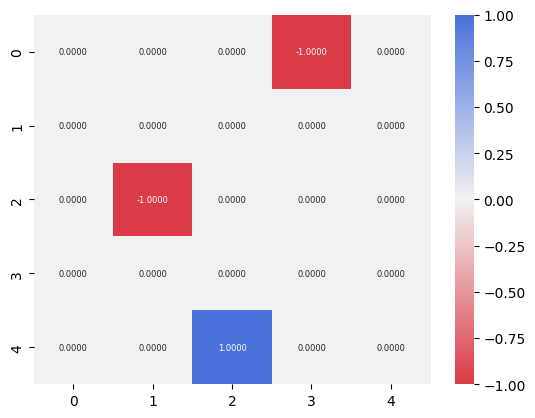

In [80]:
## Creating the Environment!
# Creating a 2D world with parameterizable dimensions for the agent (Baby Bella to move) in four dimensions.
Columns = 5
Rows = 5
Num_of_Blocked_Cells = 2

# Creating a 2D array of zeros with the specified dimensions
RewardMatrix = np.array([[0 for i in range(Columns)] for j in range(Rows)])

# Randomly creating blocked cells in the world. These "blocked" cells are the obstacles that the agent cannot pass through. Therefore they have a negative reward associated with them.
for i in range(0, Num_of_Blocked_Cells):
    y = np.random.randint(0, Columns)
    x = np.random.randint(0, Rows)
    RewardMatrix[x][y] = -1

# Specifying the random terminal state in the grid world. This is where Baby Bella is reunited with her little sister, Biscottini!!
Biscottini_x = np.random.randint(0, Rows)  
Biscottini_y = np.random.randint(0, Columns)
RewardMatrix[Biscottini_x][Biscottini_y] = 1

# Storing the grid world in a dataframe for better visualization.
RewardMatrix_df = pd.DataFrame(RewardMatrix)



## Displaying the intial state of the grid world and the initiate value function.

# Displaying the grid world in a heatmap using the seaborn library. The heatmap describes the terminal state, the blocked cells and the rewards associated with each cell.
cmap = sns.diverging_palette(10, 259, as_cmap=True)
RewardMatrix_df_colored = sns.heatmap(RewardMatrix_df, cmap=cmap, annot=True, fmt=".4f", annot_kws={'size':6},vmin=RewardMatrix_df.min().min(), vmax=RewardMatrix_df.max().max())
display(RewardMatrix_df_colored)


## Solving the optimization without transition probabilities and printing the results

Converged at number of iterations:  475
Delta:  9.313225746154785e-10
Epsilon:  1e-09
Gamma:  0.5
Number of times environment was completely iterated:  19.0


<Axes: >

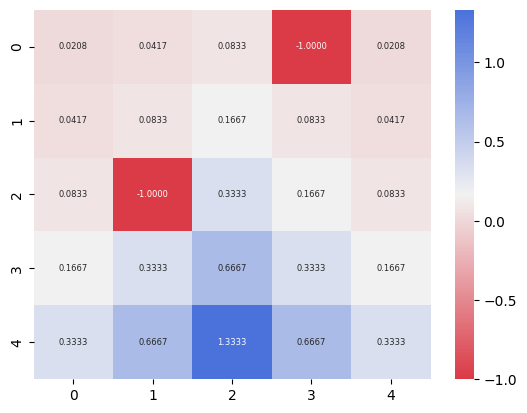

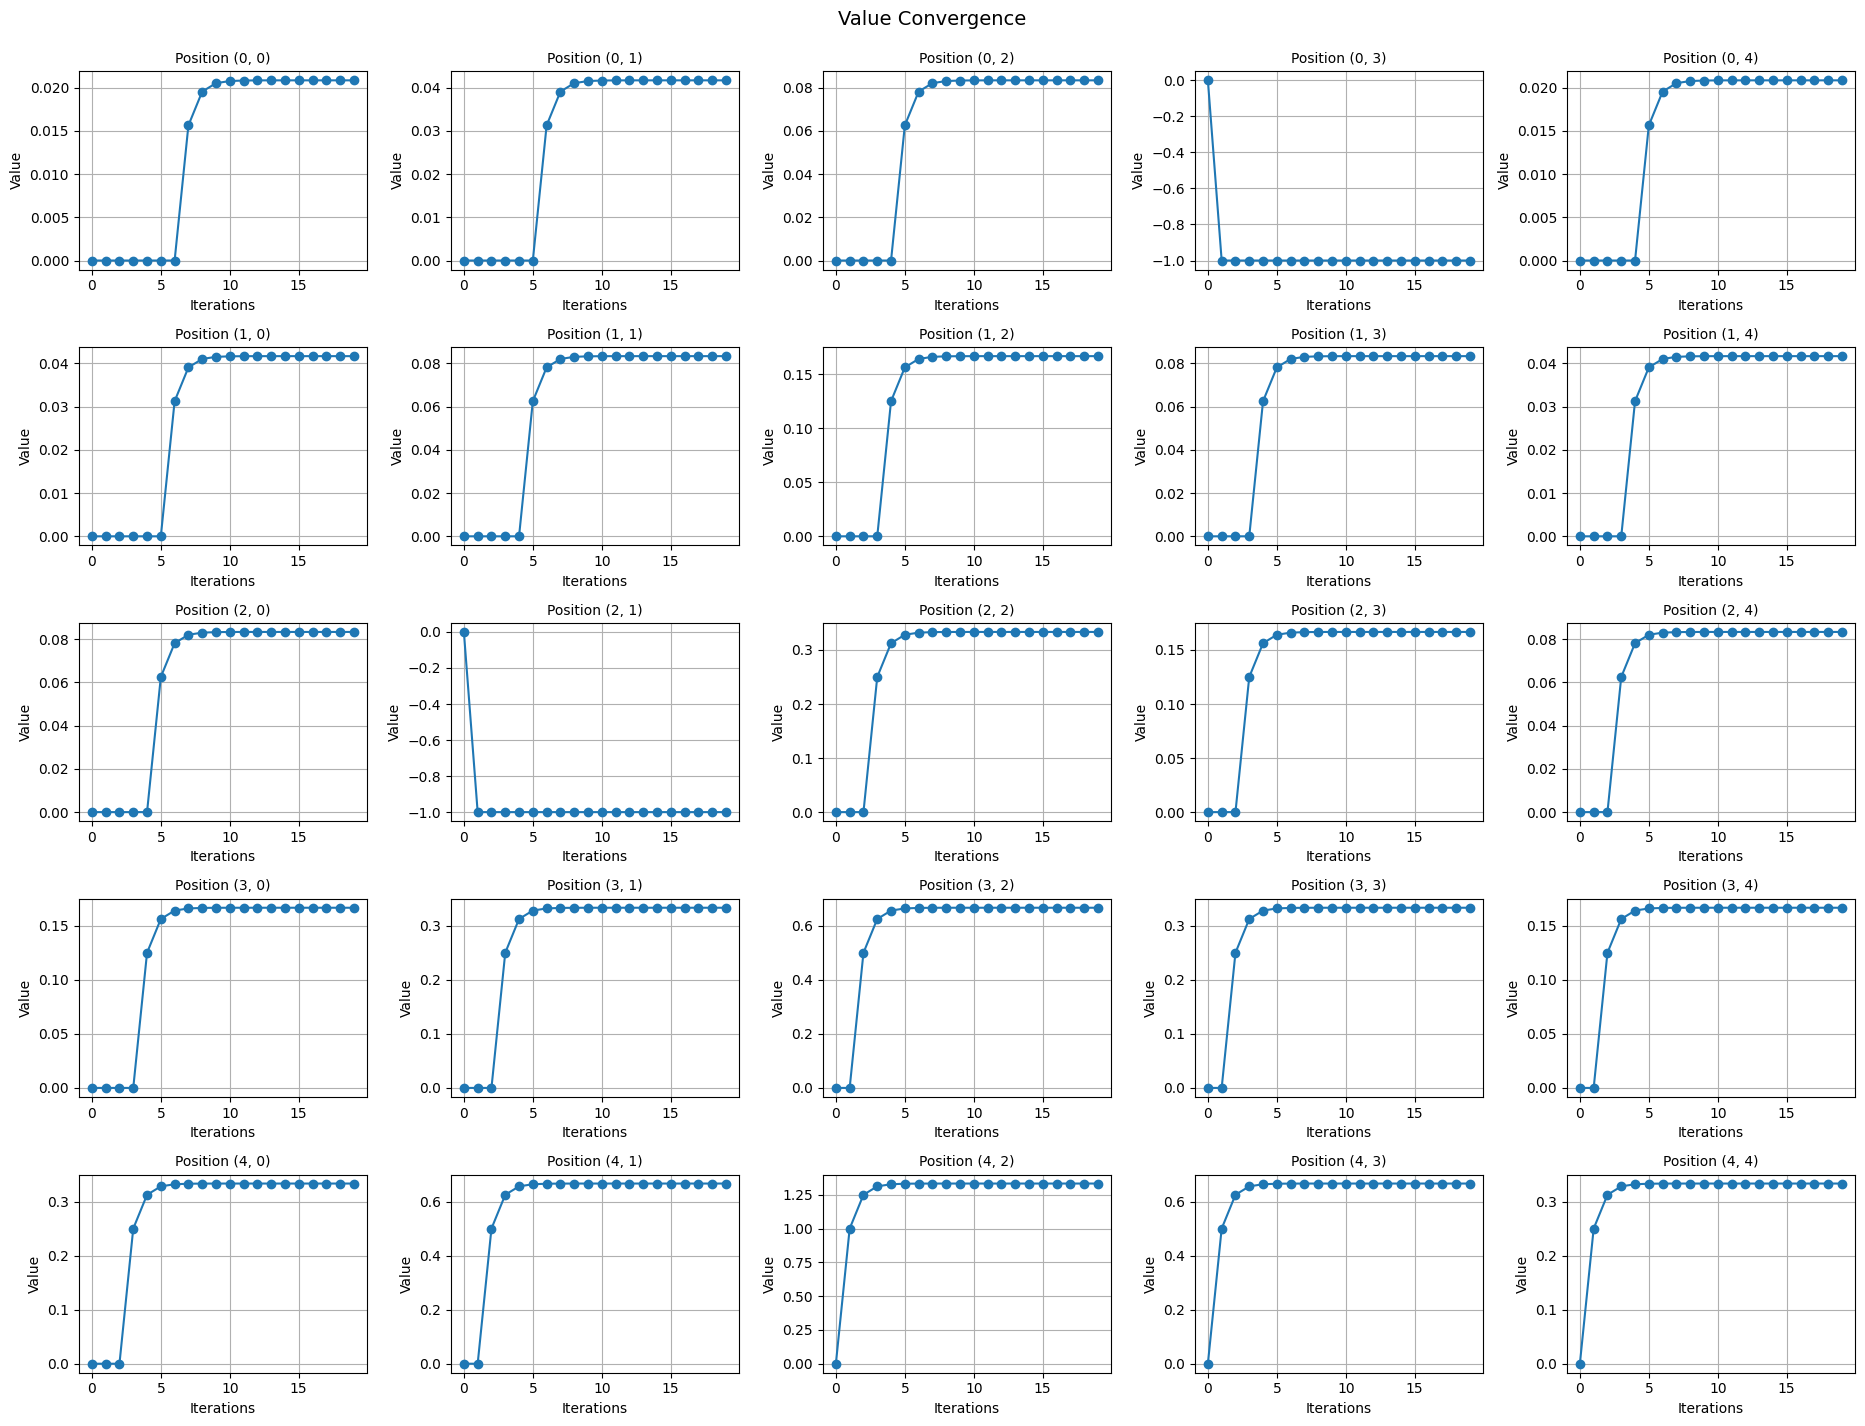

In [81]:
## Implementing the Value Iteration Algorithm

# Intializing hyperparameters for the value iteration algorithm
gamma = 0.5
epsilon = 10e-10

# Initializing the value function, optimal value function, value function history, and number of iterations to zero. 
Value_Function = np.zeros((Rows,Columns))
optimal_value_function = np.zeros((Rows,Columns))
Value_Function_History = np.zeros((Rows,Columns))
num_of_iter = 0


# Starting the value iteration algorithm loop and iterating until convergence. 
while True:
    
    delta = 0 # Initializing delta to zero.
    
    for i in range(Rows): # i is the x coordinate
        for j in range(Columns): # j is the y coordinate
            
            # if the cell is not blocked
            if RewardMatrix[i,j] != -1: 

                # Implementation of the Bellman Optimality Equation
                v = Value_Function[i,j]
                max_value = -np.inf # Initializing the max value to negative infinity to ensure that the first value is greater than.

                # for each possible action
                for x , y in [(i-1, j), # down
                              (i+1, j), # up
                              (i, j-1), # left
                              (i, j+1)]: # right

                    # if the action is valid
                    if 0 <= x < Rows and 0 <= y < Columns and RewardMatrix[x,y] != -1:

                        # Action Value Function
                        action_value = RewardMatrix[i,j] + gamma * Value_Function[x,y]

                        # Bellman Optimality Equation
                        max_value = max(max_value, action_value)
                
                # Updating the value function
                Value_Function[i,j] = max_value

                # Updating delta
                delta = max(delta, abs(v - Value_Function[i,j]))
            
            # if the cell is blocked
            else:
                # Setting the value function to -1
                Value_Function[i,j] = -1
            
            # Updating the number of iterations
            num_of_iter += 1            

            # Storing the value function history
            if num_of_iter % (Columns*Rows) == 0:
                
                # Creating a new layer in the value function history array
                new_Value_Function_History_layer = Value_Function.copy()
                
                # Stacking the new layer on top of the previous layers
                Value_Function_History = np.dstack((Value_Function_History, new_Value_Function_History_layer))
    
    # Breaking the loop if the value function has converged
    if delta < epsilon:
        
        # Printing the number of iterations, delta, epsilon, gamma, and the number of times the environment was completely iterated.
        print('Converged at number of iterations: ', num_of_iter)
        print('Delta: ', delta)
        print('Epsilon: ', epsilon)
        print('Gamma: ', gamma)
        print('Number of times environment was completely iterated: ', num_of_iter/(Columns*Rows))
        
        # Storing the optimal value function in a variable called optimal_value_function and deleting the value function to save memory.
        optimal_value_function = Value_Function.copy()
        del Value_Function 
        break

## Displaying the final state of the grid world and the optimal value function

# Storing the value functoin in a dataframe
optimal_value_function_df = pd.DataFrame(optimal_value_function)

# Displaying the optimal value function in a heatmap using the seaborn library. The heatmap describes the optimal value function for each cell in the grid world.
cmap = sns.diverging_palette(10, 259, as_cmap=True)
optimal_value_function_df_colored = sns.heatmap(optimal_value_function_df, cmap=cmap, annot=True, fmt=".4f", annot_kws={'size':6},vmin=optimal_value_function_df.min().min(), vmax=optimal_value_function_df.max().max())
display(optimal_value_function_df_colored)

## Displaying the change of the value function over time for a respective state in the environment. 

# Create a grid of graphs that is the same size as the grid world
figL = (3.75 * Columns)
figH = (2.5 * Rows) + 2
fig, axs = plt.subplots(Rows, Columns, figsize=(figL, figH))

# For each cell in the grid world
for i in range(Rows):
    for j in range(Columns):
        
        # Create a graph for the cell
        ax = axs[i, j]
        ax.plot(range(len(Value_Function_History[i, j])), Value_Function_History[i, j], marker='o')
        ax.set_xlabel("Iterations")
        ax.set_ylabel("Value")
        ax.set_title(f"Position ({i}, {j})",fontsize=10)
        ax.grid(True)
# Add a title to the figure
fig.suptitle("Value Convergence\n", fontsize=14)

# Display the figure
plt.tight_layout()
plt.show()


## Converting this to an object & adding fixed Transition Probabilities!

In [82]:
class value_iteration_model:

    def __init__(self,Columns, Rows, Num_of_Blocked_Cells, Gamma, Epsilon,PTrans=None, EnvNoiseSTD = None):
        # Intializing hyperparameters for the value iteration algorithm. This includes the discount factor, gamma, the convergence threshold, epsilon and now the PTrans parameter.
        self.Columns = Columns
        self.Rows = Rows
        self.Num_of_Blocked_Cells = Num_of_Blocked_Cells
        self.gamma = Gamma # Controls the importance of future rewards. A higher gamma discounts the value of future rewards more.
        self.epsilon = Epsilon # Controls the convergence threshold. A lower epsilon means that the value function has to converge more before the algorithm stops.
        self.Value_Function_History = np.zeros((Rows,Columns))
        self.optimal_value_function = np.zeros((Rows,Columns))
        self.IntialRewardMatrix = np.zeros((Rows,Columns))
        if PTrans is not None: # Ensuring that the PTrans parameter is a float between 0 and 1.
            if type(PTrans) != float or PTrans < 0 or PTrans > 1: raise TypeError('PTrans must be a float between 0 and 1')
            else: self.PTrans = PTrans # Controls the probability that the agent will move in the direction that it intended to move in.
        self.EnvNoise = EnvNoiseSTD

    def create_world(self):
        # Creating a 2D array of zeros with the specified dimensions
        Columns = self.Columns
        Rows = self.Rows
        Num_of_Blocked_Cells = self.Num_of_Blocked_Cells
        RewardMatrix = np.array([[0 for i in range(Columns)] for j in range(Rows)])
        # Randomly creating blocked cells in the world. These "blocked" cells are the obstacles that the agent cannot pass through. Therefore they have a negative reward associated with them.
        for i in range(0, Num_of_Blocked_Cells):
            y = np.random.randint(0, Columns)
            x = np.random.randint(0, Rows)
            RewardMatrix[x][y] = -1

        # Specifying the random terminal state in the grid world. This is where Baby Bella is reunited with her little sister, Biscottini!!
        Biscottini_x = np.random.randint(0, Rows)  
        Biscottini_y = np.random.randint(0, Columns)
        RewardMatrix[Biscottini_x][Biscottini_y] = 1

        # Storing the grid world for later use.
        self.IntialRewardMatrix = RewardMatrix.copy()

    def Print_Intial_RewardMatrix(self):
        # Displaying the grid world in a heatmap using the seaborn library. The heatmap describes the terminal state, the blocked cells and the rewards associated with each cell.

        RewardMatrix = self.IntialRewardMatrix
        RewardMatrix_df = pd.DataFrame(RewardMatrix)
        cmap = sns.diverging_palette(10, 259, as_cmap=True)
        RewardMatrix_df_colored = sns.heatmap(RewardMatrix_df, cmap=cmap, annot=True, fmt=".4f", annot_kws={'size':6},vmin=RewardMatrix_df.min().min(), vmax=RewardMatrix_df.max().max())
        display(RewardMatrix_df_colored)

    def Run_Optimization(self):
        # Implementing the Value Iteration Algorithm

        # Grabbing the hyperparameters and the grid world
        gamma = self.gamma
        epsilon = self.epsilon
        Rows = self.Rows
        Columns = self.Columns
        RewardMatrix = self.IntialRewardMatrix
        PTrans = self.PTrans
        
        # Initializing the value function and number of iterations to zero.
        Value_Function = np.zeros((Rows,Columns))
        num_of_iter = 0

        # Starting the value iteration algorithm loop and iterating until convergence.
        while True:
            
            delta = 0 # Initializing delta to zero.
            
            for i in range(Rows): # i is the x coordinate
                for j in range(Columns): # j is the y coordinate

                    # if the cell is not blocked
                    if RewardMatrix[i,j] != -1: 

                        # Implementation of the Bellman Optimality Equation
                        v = Value_Function[i,j] # Grabbing the value function for the cells
                        max_value = -np.inf # Initializing the max value to negative infinity to ensure that the first value is greater than.

                        # loop for each possible action (i.e. up, down, left, right)
                        for x , y in [(i-1, j) # down
                                    , (i+1, j) # up
                                    , (i, j-1) # left
                                    , (i, j+1)]: # right

                            # if the action is valid, its not going to go off the edge of the world or going to a blocked cell.
                            if 0 <= x < Rows and 0 <= y < Columns and RewardMatrix[x,y] != -1:

                                # Action value function!
                                action_value = RewardMatrix[i,j] + gamma * Value_Function[x,y]

                                # Adding PTrans to the action value function!
                                if PTrans is not None:
                                    Random_PTrans = np.random.uniform(0,1)
                                    
                                    # If the random PTrans is greater than the PTrans parameter, then the action value function is the same as the action value function without PTrans.
                                    # This is probability of 1 - PTrans and is the probability that the agent will move in the direction that it intended to move in.
                                    if Random_PTrans > PTrans:
                                        max_value = max(max_value, action_value) 
                                    
                                    # If the random PTrans is less than the PTrans parameter, then the action value function will take a random action.
                                    # This is probability of PTrans and is the probability that the agent will move in the direction that it did not intend to move in.
                                    else:
                                        max_value = action_value
                                
                                # If the PTrans parameter is not specified, then the action value function is the same as the action value function.
                                else:
                                    max_value = max(max_value, action_value)
                        
                        # Updating the value function with and without environmental noise

                        if self.EnvNoise is None:
                            Value_Function[i,j] = max_value    
                        else:
                            Value_Function[i,j] = max_value + np.random.normal(loc=0, scale=self.EnvNoise)                        

                        # Updating delta
                        delta = max(delta, abs(v - Value_Function[i,j]))
                    
                    # if the cell is blocked
                    else:
                        # Setting the value function to -1
                        Value_Function[i,j] = -1 

                    # Updating the number of iterations
                    num_of_iter += 1            

                    # Storing the value function history
                    if num_of_iter % (Columns*Rows) == 0:

                        # Creating a new layer in the value function history array
                        new_Value_Function_History_layer = Value_Function.copy()

                        # Stacking the new layer on top of the previous layers
                        self.Value_Function_History = np.dstack((self.Value_Function_History, new_Value_Function_History_layer))
                                
            # Breaking the loop if the value function has converged
            if delta < epsilon:

                # Printing the number of iterations, delta, epsilon, gamma, and the number of times the environment was completely iterated.
                print('Converged at number of iterations: ', num_of_iter)
                print('Delta: ', delta)
                print('Epsilon: ', epsilon)
                print('Gamma: ', gamma)
                print('Number of times environment was completely iterated: ', num_of_iter/(Columns*Rows))

                # Storing the optimal value function in a variable called optimal_value_function and deleting the value function to save memory.
                self.optimal_value_function = Value_Function.copy() # Storing the optimal value function in a variable called optimal_value_function
                del Value_Function # Deleting the value function
                break
    
    def Print_Final_RewardMatrix(self):
        # Displaying the final state of the grid world and the optimal value function
        optimal_value_function = self.optimal_value_function
        optimal_value_function_df = pd.DataFrame(optimal_value_function)
        cmap = sns.diverging_palette(10, 259, as_cmap=True)
        optimal_value_function_df_colored = sns.heatmap(optimal_value_function_df, cmap=cmap, annot=True, fmt=".4f", annot_kws={'size':6},vmin=optimal_value_function_df.min().min(), vmax=optimal_value_function_df.max().max())
        display(optimal_value_function_df_colored)

    def Print_Value_Funct_Hist(self):
        # Displaying the change of the value function over time for a respective state in the environment.
        Value_Function_History = self.Value_Function_History
        Rows = self.Rows
        Columns = self.Columns
        
        # Create a grid of graphs that is the same size as the grid world
        figL = (3.75 * Columns)
        figH = (2.5 * Rows) + 2
        fig, axs = plt.subplots(Rows, Columns, figsize=(figL, figH))
        for i in range(Rows):
            for j in range(Columns):

                # Create a graph for the cell
                ax = axs[i, j]
                ax.plot(range(len(Value_Function_History[i, j])), Value_Function_History[i, j], marker='o')
                ax.set_xlabel("Iterations")
                ax.set_ylabel("Value")
                ax.set_title(f"Position ({i}, {j})",fontsize=10)
                ax.grid(True)
        
        # Add a title to the figure
        fig.suptitle("Value Convergence\n", fontsize=14)
        
        # Display the figure
        plt.tight_layout()
        plt.show()


## Testing the new object with transition probabilities & no environmental noise

Converged at number of iterations:  210
Delta:  2.384185791015625e-07
Epsilon:  0.001
Gamma:  0.5
Number of times environment was completely iterated:  14.0


<Axes: >

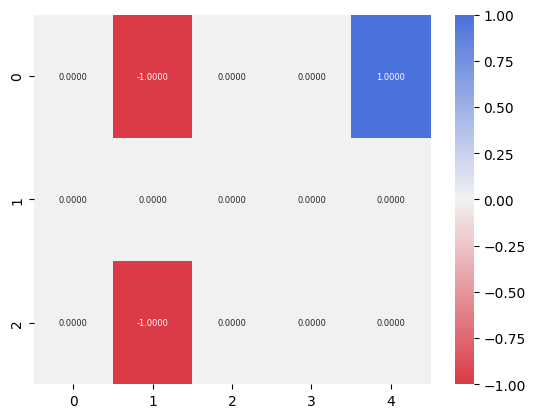

In [115]:
# Creating an instance of the value iteration model
model = value_iteration_model(Columns = 5, Rows = 3, Num_of_Blocked_Cells = 2, Gamma = 0.5, Epsilon = 0.001, PTrans=0.1)

# Creating the environment
model.create_world()

# Running the value iteration algorithm
model.Run_Optimization()

# Displaying the intial state of the grid world and the value function.
model.Print_Intial_RewardMatrix()

<Axes: >

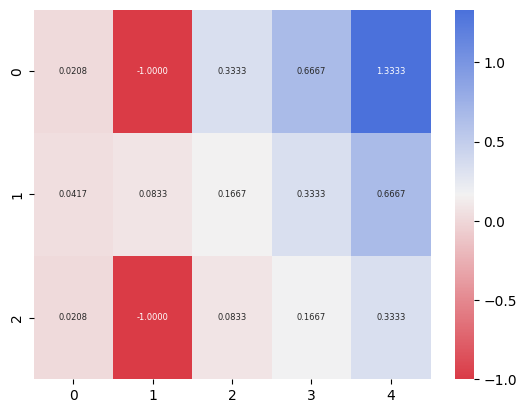

In [116]:
# Displaying the final state of the grid world and the optimal value function.
model.Print_Final_RewardMatrix()

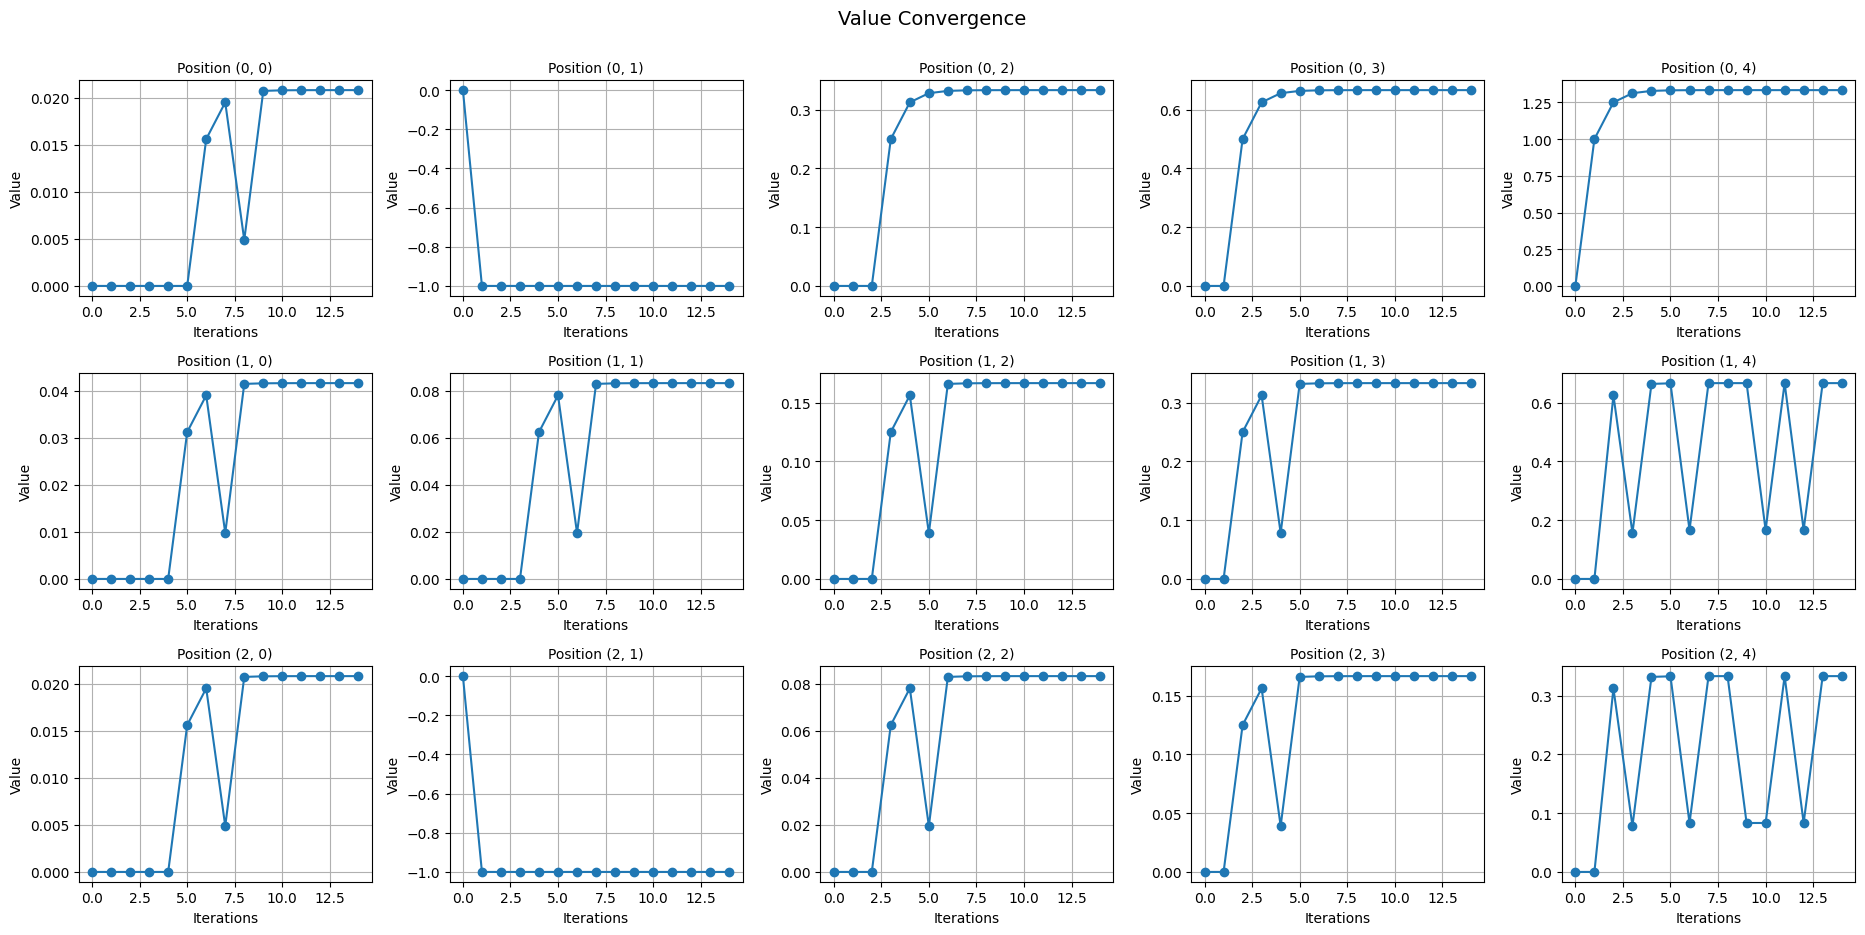

In [117]:
# Displaying the change of the value function over time for a respective state in the environment.
model.Print_Value_Funct_Hist()

## Testing the new object with transition probabilities & some environmental noise

Converged at number of iterations:  1880
Delta:  0.009028352601669787
Epsilon:  0.01
Gamma:  0.5
Number of times environment was completely iterated:  94.0


<Axes: >

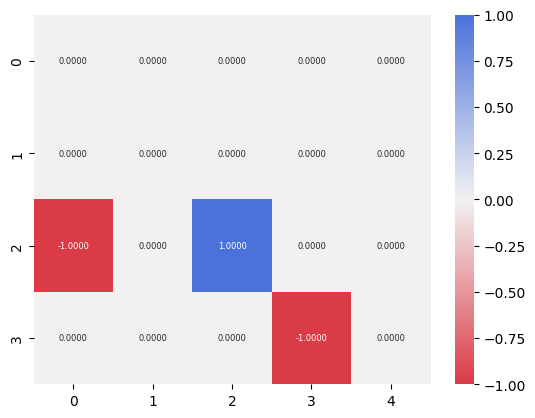

In [137]:
# Creating an instance of the value iteration model
model = value_iteration_model(Columns = 5, Rows = 4, Num_of_Blocked_Cells = 2, Gamma = 0.5, Epsilon = 0.01, PTrans=0.1, EnvNoiseSTD=0.005)

# Creating the environment
model.create_world()

# Running the value iteration algorithm
model.Run_Optimization()

# Displaying the intial state of the grid world and the value function.
model.Print_Intial_RewardMatrix()

<Axes: >

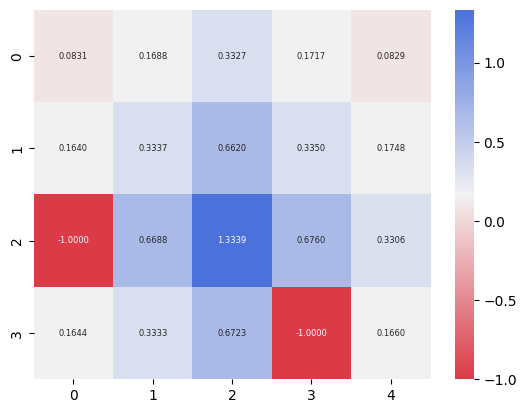

In [138]:
# Displaying the final state of the grid world and the optimal value function.
model.Print_Final_RewardMatrix()

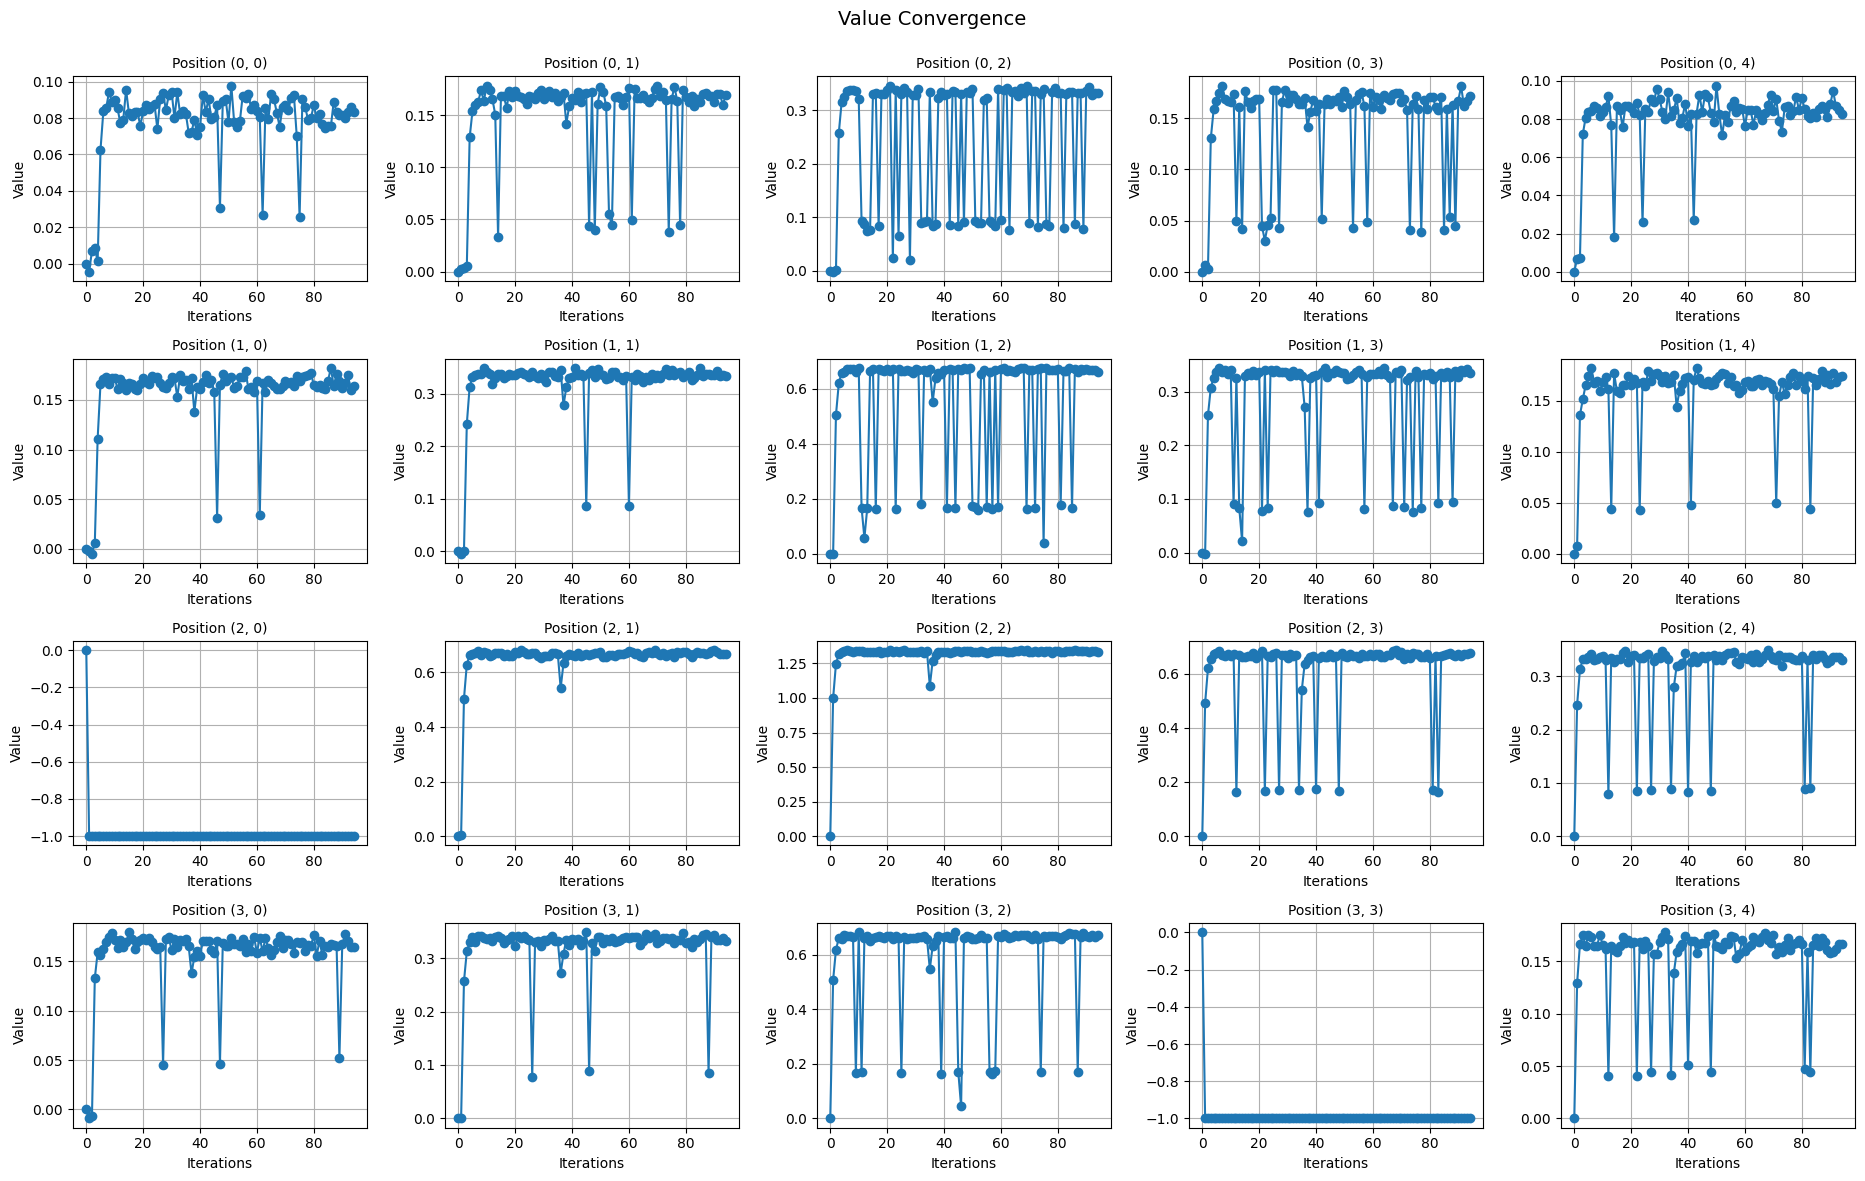

In [139]:
# Displaying the change of the value function over time for a respective state in the environment.
model.Print_Value_Funct_Hist()